# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    -  Unsupervised
##### **Contribution**    - Individual

# **Project Summary**

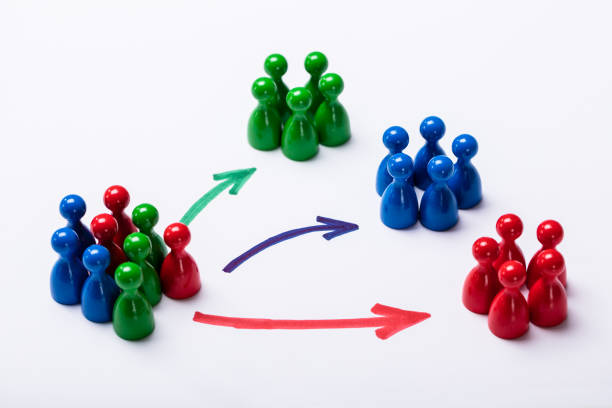

In this project, we have a transnational dataset that contains all the transactions for UK-based and registered non-store online retail. Firstly, I loaded the dataset using pd.read_excel as the dataset is in xlsx file format. The dataset has a total of 541,909 rows with 8 columns. Further exploring the dataset, the total number of duplicate values found is 5,268. Also, there are many null values present in the Description and CustomerID columns; the null values for the respective columns are 1,454 and 135,080, meaning the total missing values in the entire dataset are 136,534.

The columns in the dataset are InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country, which provide details for every transaction. I created a copy of the original dataset so that further analysis and changes made to the data do not affect the original one, and the original data must stay intact. I removed all null values from the dataset as it's not possible to fill any value in the Description and CustomerID columns as both are categorical data. Additionally, I removed all duplicate values.

I visualized the data and found out some important details about transactions. I plotted a bar plot to view the top 10 products based on maximum selling and identified the top 10 CustomerIDs that are making purchases, among many other details. I used a distribution plot to check the skewness of the Quantity and UnitPrice columns. I added a few new columns named total_price using the existing UnitPrice and Quantity columns. I also extracted Day, Month, Year, Month_num, Day_num, Hour, and Minute from the InvoiceDate column and created those new columns.

These new columns have been created to know more about the dataset, such as in which month most of the selling happened, when people prefer to shop, when the sale is at its highest peak, and so on. I created an RFM (Recency, Frequency, and Monetary) model. This model is based on three quantitative factors: how recently a purchase was made, how often a purchase is made, and how much is spent on purchases. These three factors help us decide whether the customer is a good customer or a lost customer. Making such analysis makes it easy to divide customers based on these factors and apply the correct marketing strategy to customers as per their segmentation. It makes sense that a low-middle-class person should not get an offer to shop for Gucci or any branded product.

Firstly, I created recency using the latest date and the last invoice date, then created frequency using the count of the invoice number for a particular CustomerID, and finally, I created a monetary column by taking the sum of the total_price column. I created a dataframe for the RFM model, calculated scores for RFM, and values for RFM. Based on those RFM scores and values, customer segmentation will be implemented. I calculated log values for RFM and saved them in another dataframe. This transformed dataframe will be used for model implementation. StandardScaler is used to standardize the data values into a standard format.

Finally, the K-means clustering algorithm is implemented using both elbow and silhouette methods. These methods provide the optimal number of clusters. Hierarchical clustering is also implemented, providing the optimal number of clusters for segmentation. The ultimate objective for customer segmentation has been achieved.

# **GitHub Link**

https://github.com/Shubhangi-Tiwari/Online-Retail-Customer-Segmentation

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from prettytable import PrettyTable

from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/Online Retail.xlsx'
online_customer=pd.read_excel(path)

### Dataset First View

In [ ]:
# Dataset First Look
online_customer.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
online_customer.shape

### Dataset Information

In [ ]:
# Dataset Info
online_customer.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate=online_customer.duplicated().sum()
print(f'The total number of duplicate values in dataset is',duplicate)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
online_customer.isna().sum()

In [ ]:
# Missing Values/Null Values Count
missing_value=online_customer.isna().sum().sum()
print('The total number of missing values is', missing_value)

In [ ]:
# Function to print percentage of missing values per column
def mis_val(d):
    l=[]
    for x in d.isnull().sum().index:
        g=[]
        g.append(x)
        g.append(d[x].isnull().sum())
        per=(d[x].isnull().sum()/len(d))*100
        g.append(per)
        l.append(g)
    misd=pd.DataFrame(l)
    misd.columns=['Column','Missing Value','Percentage of Missing Value']
    misd.sort_values(by='Percentage of Missing Value',ascending=False,inplace=True)
    return misd

In [ ]:
#Viewing the missing value for every other variable
mis_val(online_customer)

In [ ]:
# Visualizing the missing values
sns.heatmap(online_customer.isna())

### What did you know about your dataset?

This is the transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts.

The dataset consists of 541909 rows and 8 columns.

There are total 5268 duplicate values present in the dataset.

There are total 136534 missing values in Dataset which is in Description variable with 1454 missing value and CustomerID variable with 135080 missing values.

There are total 24.92% of missing values in Description and 0.26% of missing values in CustomerID.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
online_customer.columns

In [ ]:
# Dataset Describe
online_customer.describe()

### Variables Description

InvoiceNo - Invoice number for the transaction.

StockCode - StockCode is the code for product.

Description - Description of the product.

Quantity - The quantities of each product per transaction.

InvoiceDate - Date of the Invoice.

UnitPrice - Product Price for each unit.

CustomerID - CustomerID uniquely assigned to each customer.

Country- The name of the country from where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using for loop.(Count of unique values in each particular column)
for i in online_customer.columns.tolist():
  print("No. of unique values in ",i,"is",online_customer[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=online_customer.copy()

In [ ]:
#Viewing data to check top 10 most purchased item
df['Description'].value_counts().head(10)

In [ ]:
#Viewing data to check top 10 country for purchase
df['Country'].value_counts().head(10)

In [ ]:
#Dropping missing values of CustomerID as it will not be possible to replace those IDs and the description for items
df.dropna(axis=0,inplace=True)

In [ ]:
#Checking missing value if removed or not
mis_val(df)

In [ ]:
#Visualizing top 10 description on product
top_10_products =df['Description'].value_counts()[:10]

In [ ]:
df.loc[138:160,['UnitPrice','Description','InvoiceNo']]

In [ ]:
# Creating a dataframe without cancelled ordered as there are
df = online_customer[~online_customer['InvoiceNo'].astype(str).str.contains('C')]

In [ ]:
# Grouping the dataset by its description column and calculating sum of all similar description quantity to have a look on overall top 10 selling product

product = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

# Creating dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product

In [ ]:
# Remove all missing and duplicate values in the CustomerID colum
df = df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()

In [ ]:
# Grouping the dataset by its description column and calculating sum of all similar description quantity to have a look on overall top 10 least selling product

product1 = df.groupby('Description')['Quantity'].sum().sort_values().head(10)

# Creating dataframe containing the top 10 selling products
least_product = pd.DataFrame({'Product': product1.index, 'Quantity Sold': product1.values})
least_product

In [ ]:
#Viewing top 10 customers that purchased from retail
top_customers=df['CustomerID'].value_counts().head(10)
top_customers

In [ ]:
#Viewing stockcode of product with most of the selling count
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

In [ ]:
StockCode_df.tail()

### What all manipulations have you done and insights you found?

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. As working on dataset, found many null and duplicates values so first of all created a copy of Original dataset so that changes can be done on that copy dataset to avoid replacing or altering original data.

Removed all missing values from Description and CustomerID as both the columns are categorical columns and it is not possible to replace their missing value with any other value.

Removed all the cancelled orders from dataset as all the cancelled invoices had price in minus which means no sale was done and order was cancelled so updated the dataframe without cancelled order.

Removed all the duplicate values from the dataset to avoid any misleading information.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Visualizing top 10 selling product
plt.figure(figsize=(15,6))
sns.barplot(y=top_10_products,x=top_10_products.index,orient='v',palette='cool')
plt.xlabel('Products')
plt.ylabel('Total number of quantity')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show top 10 description of product wrt number of quantity I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The insights found from chart shows the most selling product as per count in the online retail, this makes us understand which particular products are in demand and selling the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely it will help to understand the popularity of product and make neccessary changes or updated needed for every other product.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,5))
sns.barplot(y=top_customers,x=top_customers.index,orient='v',color='yellowgreen')
plt.xlabel('Top Customers')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show top 10 Customers that shop the most from online retail I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The plotted chart gives us CustomerID for every other customer with the most purchase, as of now it shows the top 10 customers that shops most as compare to other customers.As per chart 12748 CustomerID purchases the most followed by 13089,13263,14096,14298,14606 and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight help creating a positive business impact as we know the top customers and we can target those customer accordingly.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
top10_country= df['Country'].value_counts()[:10]
sns.barplot(y=top10_country,x=top10_country.index,orient='v',palette='bright')
plt.xlabel('Country')
plt.ylabel('Frequency of Purchases')
plt.title('Top 10 Country for Purchases')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show top 10 Countries from where most of the customer resides I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The insight found from chart shows the location of the customer, as it is very clear from visualization that most of the customers are from United Kingdom followd by Germany, France, EIRE, Spain and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight help creating a positive business impact as we get to know the location from where most customer reside so accordingly offers and other rewards can be implemented for that particular location as per customer strength.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
least5_country= df['Country'].value_counts()[-5:]
sns.barplot(y=least5_country,x=least5_country.index,orient='v',palette='dark')
plt.xlabel('Country')
plt.ylabel('Frequency of Purchases')
plt.title('Least 5 Country for Purchases')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show least 5 countries from where minimum number of customer are present I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The insight found from chart shows the location with the least number of customers which is Lithuania followed by Brazil, Czech Republic Country, Bahrin and Saudi Arania

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight help creating a positive business impact as we know the customer strength in those countries and work on howto increase number of customers.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5],palette='pastel')

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

The specific chart shows the most selling StockCode of products.

##### 2. What is/are the insight(s) found from the chart?

The insight found from chart shows the most selling StockCode for products, the highest selling stock code is 85123A, followed by 22423, 85099B,84879 and 47566

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Checking distribution of Quantity
plt.figure(figsize=(14,8))
sns.distplot((df['Quantity']),color='r')


##### 1. Why did you pick the specific chart?

The specific chart is picked to view the distribution of Quantity variable.

##### 2. What is/are the insight(s) found from the chart?

The chart plotted shows that data is positively skewed and need transformation.

**1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**

**2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode**

**3. For symmetric graph mean=median=mode bold text**

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(14,8))
sns.distplot(np.log(df['Quantity']),color='b')

##### 1. Why did you pick the specific chart?

To check the distribution after transformation is applied so that distribution can be changed to close to normal distribution for better results.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart shows that after transformation is applied to variable it seems to be changed and look close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help us to understand the distribution of variable.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(14,8))
sns.distplot((df['UnitPrice']),color='b')

##### 1. Why did you pick the specific chart?

The specific chart is picked to view the distribution of Quantity variable.

##### 2. What is/are the insight(s) found from the chart?

It is clear from plotted graph that data is not normally distributed, it seems that data is positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help to understand if data is normally distributed or not, which is really important to know as further transformation depends on how the data is distributed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
online_customer.isnull().sum()

In [ ]:
# Handling Missing Values & Missing Value Imputation
online_customer.isnull().sum().sum()

In [ ]:
#Dropped missing values and created a copy of dataframe as df in data wrangling section
#Viewing the clean dataframe
df.isna().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were total 136534 missing values, these values were present in CustomerID variable totalling of 135080 and in Description variable total of 1454 missing values.

There aredifferent scenario to deal with missing values, we can either replace those values with mean, median or mode but in this dataset as missing values were customerID it was not suitable to replace with any parameter, also description of product cannot be replaced with any value hence dropped all the missing values from data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''No outliers were removed as most of the columns are categorical'''

##### What all outlier treatment techniques have you used and why did you use those techniques?

Most of the variables are categorical columns so no need to treat outliers.

## 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

In [ ]:
#Creating a new feature using quantity and unitprice variable named as total price
df['total_price']=df['UnitPrice']* df['Quantity']

In [ ]:
#Extracting new feature day name from Invoice Date
df['Day']=df['InvoiceDate'].dt.day_name()

In [ ]:
#Extracting new feature month name from Invoice Date
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
#Creating new features such as Year, Month Number, Day Number, Hour and Minute for further analysis
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
#Viewing the dataframe with new added features
df.head()

In [ ]:
df['total_price'].describe()

#### Chart - 9

In [ ]:
#Plotting new feature 'total_price' to view as per its statistical values
plt.figure(figsize=(12,6))
df['total_price'].describe().plot()

In [ ]:
#Viewing the month in which most of the products were saled
df['Month'].value_counts().head(10)

In [ ]:
#Viewing month with respect to most of the purchase
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

#### Chart - 10

In [ ]:
#Plotting month new feature
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

In [ ]:
#Viewing hour with respect to most of the purchase
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

#### Chart - 11

In [ ]:
#Plotting hour new feature
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

#**Create the RFM model (Recency, Frequency,Monetary value)**

RFM analysis allows a comparison between potential contributors and clients. It gives organizations a sense of how much revenue comes from repeat customers (vs. new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.


The RFM model is based on three quantitative factors:

1.Recency: How recently a customer has made a purchase

2.Frequency: How often a customer makes a purchase

3.Monetary value: How much money a customer spends on purchases

**Performing RFM Segmentation and RFM Analysis, Step by Step**

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

**1.Recency**

In [ ]:
#Recency = Latest Date - Last Inovice Data
#Amount for each customer
import datetime as dt

#Checking the latest date for invoice
print('Start Date: {}'.format(df['InvoiceDate'].min()))
print('End Date: {}'.format(df['InvoiceDate'].max()))

In [ ]:
#Saving the latest date as 2011-12-10 as last invoice date was 2011-12-09
latest_date = dt.datetime(2011,12,10)

In [ ]:
#Calculationg recency of each customer's last purchase
recency_df=df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date - x.max()).days})


In [ ]:
#Display first 12 rows for recency dataframe
recency_df.head(12)

Now as recency have been calculated for every customerID, in the same way need to calculate frequency and monetary.

**2.Frequency**

In [ ]:
#Frequency = count of invoice no. of transaction(s)
freq_df=df.groupby('CustomerID').agg({'InvoiceNo':lambda x:len(x)})

In [ ]:
#Viewing the frequency dataframe
freq_df.head(10)

**3.Monetary**

In [ ]:
#Monetary = Sum of Total
#monetary_df=df.groupby('CustomerID').agg({'total_price':lambda x:x.sum()})
monetary_df = df.groupby(['CustomerID'])[['total_price']].sum()

monetary_df

In [ ]:
#Merging recency and frequency dataframes
rf_df = recency_df.merge(freq_df, on = 'CustomerID')
rf_df.head()

In [ ]:
#Merging recency,frequency and monetary dataframes
rfm_df = rf_df.merge(monetary_df, on = 'CustomerID')
rfm_df.head()

In [ ]:
#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'total_price': 'Monetary'}, inplace=True)
#Resetting index
rfm_df.reset_index().head()

**Split into four segments using quantiles**


In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
#Viewing the splitted four segment for recency,frequency and monetary
quantiles

In [ ]:
# Creating RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [ ]:
#Viewing the rfm dataframe with new added features with their scores
rfm_df.head()

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].sum(axis = 1)

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup Value'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [ ]:
rfm_df.head()

Interpretation for created RFM Group value are as follows:

Best RecencyScore found to be 4 that means user purchased most recently.

Best FrequencyScore found to be 4 that means user purchase most frequently.

Best MonetaryScore found to be 4 that means user who spent the most.

If the RFMScore of any customer is 444 then his Recency is good, frequency is more and Monetary is more. So, he is the best customer.

If the RFMScore of any customer is 111 then his Recency is low, frequency is low and Monetary is low. So, he is the churning customer.

If the RFMScore of any customer is 144 then it suggests that user purchased a long time ago but buys frequently and spends more.

If the RFMScore of any customer is 441 then it suggests that user purchase recently, buys frequently but spends less and so on.

Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
Higher the RFMScore suggests that the customer is most valuable.

## Creating Customer Segmentation based on their RFM Score

In [ ]:
#Creating customer segmentation based on RFMScore
print('Best Customer', len(rfm_df[rfm_df['RFMGroup Value'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print('Big Spenders: ',len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost Customers: ', len(rfm_df[rfm_df['RFMGroup Value'] =='244']))
print('At Risk Customers: ',len(rfm_df[rfm_df['RFMGroup Value'] == '144']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMGroup Value'] == '111']))

Now with the help of these segmentation we can choose appropriate marketing strategy for that particular group of customer.

For example for our Best Customers, we can provide Best Rewards based on their loyalty. Provide them mail or notification regarding new offers first and for any new product.

For our Big Spenders we can suggest product based on their monetary value.

For At Risk Customers, we can send personalized mails based on their purchasing and let them if there is any available offer on current session to retain those customers.



In [ ]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1)

# Display the first 5 rows
rfm_data.head()

#### Chart - 12

In [ ]:
#Visualize heatmap for the rfm_data
rfm_data.corr()
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Blues')

#### Chart - 13

In [ ]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde');

In [ ]:
#Visualize the distribution of features in the dataset using pairplot
sns.pairplot(rfm_data);

In [ ]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()

### Plotting Distribution Plot for Recency, Frequency and Monetary Variables

#### Chart - 14

In [ ]:
#Plotting distribution plot for Monetary variable
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Plotting distribution plot for Frequency variable
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Plotting distribution plot for Recency variable
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

### Plotting Distribution Plot for Recency, Frequency and Monetary Variables after transformation

#### Chart - 15

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

The above figures makes it clear that Recency, Frequency and Monetary Columns are positively skewed hence those variables needed transformation as soon as transformation is applied it plots close to normal distribution.


### 5. Data Transformation

In [ ]:
# Calculate the logarithmic values of the Recency,Monetary & Frequency features

# logarithmic value of the Recency feature
rfm_recency_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_mone_log = np.log(rfm_data['Monetary'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_freq_log = np.log(rfm_data['Frequency'])

In [ ]:
#Creating a dataframe to save all these log values for RFM
log_rmf = pd.DataFrame({'Monetary' : rfm_mone_log, 'Recency': rfm_recency_log, 'Frequency': rfm_freq_log})
log_rmf.head()

In [ ]:
#Creating a pair plot for each pair of features in the data
sns.pairplot(data = log_rmf);

In [ ]:
# Calculate the skewness of each feature in the transformed data
log_rmf.skew()

In [ ]:
# Visualizing heatmap for features correlation after log transformation or data normalization
sns.heatmap(log_rmf.corr(), annot = True, cmap = 'Reds')

In [ ]:
# use the corr method of the data frame to calculate the correlation matrix
log_rmf.corr()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation was needed as data was positively skewed for Recency, Frequency and Monetary variables so I have used log transformation to make data more normally distributed.

### 6. Data Scaling

In [ ]:
#Assigning transformed data to variable X
X=log_rmf
# Scaling your data
scaler=StandardScaler()
#Assigning features as recency, frequency and monetary for scaling
features=['Recency','Frequency','Monetary']
X=scaler.fit_transform(log_rmf[features].values)

##### Which method have you used to scale you data and why?

For scaling, I have used StandardScaler as scaler standardizes the scale and help to balance the impact of all variables which helps algorithm to improve performance.

## ***7. ML Model Implementation***

#**K Means Clustering**

### ML Model - 1 - K- Means Applying Elbow Method

In [ ]:
# ML Model - 1 Implementation Using K means with elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000,n_init=10,random_state=0)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


The Elbow method is used to show optimal number of clusters in K Means Algorithm.

In [ ]:
#predict on the model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
#Plotting scatter chart for k means cluster
plt.figure(figsize=(15,10))
plt.title('Customer Segmentation')
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

It can be observed that clusters are well separated

The above scatter plot shows the segmentation of customer based on their RFM features.

In [ ]:
#Building the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

# **Using Dendogram to find optimal number of clusters**

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

The number of cluster are decided based on the number of vertical lines that are intersected by the line drawn using threshold as it is evident from dendogram 90 is the threshold value as distance between the clusters (the vertical segments of the dendrogram) are highest.

###K-Means Applying Silhouette Score Method

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters

The Silhouette Coefficient for a sample is

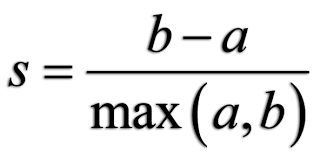

In [ ]:
silhouette_scores = []
#Assigning range for cluster values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#Using for loop to check every value for k means
for n_clusters in range_n_clusters:
  #Initialize k means using number of cluster
    clusterer = KMeans(n_clusters=n_clusters)
    #Fit the algorithm
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
  #Calculate the Silhouette score and append the value to score
    score = silhouette_score(X, preds)
    silhouette_scores.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [ ]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='green', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)

# Fit the model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

In [ ]:
# Visualization of customer segmentation based On RFM features.
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')
# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
# Plot the cluster center as green with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5, edgecolor='black')
# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')
# adding a color plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])
plt.show()

We see that Customers are well separate when we cluster them by Recency, Frequency and Monetary.

# **Hierarchical Agglomerative Clustering**

Agglomerative Clustering is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data.

### ML Model - 2 - Hierarchical Agglomerative Clustering

In [ ]:
#Fit the Algorithm
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
#Predict on model
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (two dimensions only)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

The above dendrogram shows the tree-like diagram which is used to visualize the relationship among clusters,key for interpreting a dendrogram is to concentrate on the height at which any two objects are joined together.

The insights gained from the dendrogram plot can help identify the optimal number of clusters and helps to find clusters which are similar to each other, this can help to create more sale strategies to improve overall business performance.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used to find optimal number of clusters are K Means Clustering and Hierarchical Clustering.

In K Means clustering, we used both Elbow method and Silhouette score method to find the optimal number of clusters.

In elbow method of K means clustering, graphical method is used to find number of clusters,graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K.

The elbow point of graph is basically used to find the number of clusters.

Hierarchical clustering creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

For this project, I have used Hierarchical Agglomerative Clustering which is also known as bottom-up approach,the algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

Here we can conclude that our aim to make clusters from this data that can segment similar customers together have been achieved.

# **Summary Chart**

In [ ]:
# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.','Model_Name','Data', 'Optimal_Number_of_cluster'])

# Add rows
myTable.add_row(['1',"K-Means with Silhouette_score ", "RFM", "2"])
myTable.add_row(['2',"K-Means with Elbow method  ", "RFM", "2"])
myTable.add_row(['3',"Hierarchical Clustering", "RFM", "2"])

print(myTable)

# **Conclusion**

The conclusion drawn after entire data cleaning, processing, analysing, visualizing and implementing different machine learning models are as follows:

**Conclusion drawn after Data Analysis and Visualization are:**

1.The provided dataset is of transnational transactions of a non-store online retail with lots of null and duplicate values.

2.Top 5 products based on maximum selling are White Hanging Heart T-Light Holder followed by Regency Cakestand 3 Tier , Jumbo Bag Red Retrospot, Party Bunting and Lunch Bag Red Retrospot

3.Top 5 countries based on maximum number of customers are United Kingdom, Germany, France, EIRE and Spain.

4.Top 5 countries based on least number of customers are Lithuania followed by Brazil, Czech Republic Country, Bahrin and Saudi Arania.

5.Top five Customer IDs were found to be 12748 followed by 13089,13263,14096 & 14298

6.Top 5 StockCode of product are 85123A followed by 22423,85099B,84879 and 47566.

7.Created new variables such as Day,Month,year,month_num,day_name,hour and minute using InvoiceDate column.

8.Most of the customers purchased the items in month of November, December, September and October whereas least itesm were purchased in month of April, January and February.

9.Most of the purchases were made in between 10 AM to 2 PM whereas least purchase were made at 6 AM.

10.Found out total price for each order using Quantity and UnitPrice and created a new feature named as total_price.

**Conclusion drawn after Model Implementation:**

Created RFM model (Recency, frequency, monetary) which is used to identify a company's or an organization's best customers by using certain measures.

On the basis of RFM model, customers are segmented into groups, score of RFM individually and together decides in which group customer belongs.

After creating RFM model, Machine Learning Algorithm such as K Means Clustering and Hierarchical Clustering were implemented.

In K Means Clustering, used two methods named as Elbow Method and Silhouette Score Method to find the optimal number of clusters.

Hierarchical Clustering was also implemented which basically groups similar objects into groups called clusters represented in a hierarchy graph shown as a dendrogram.




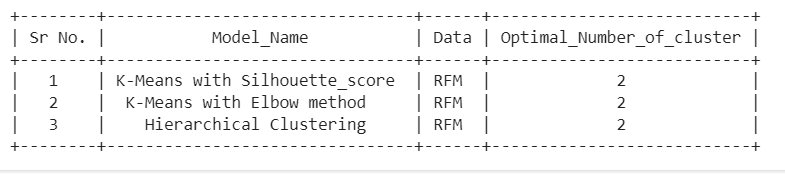

Above picture shows the summary chart for all the implemented models from which we can conclude the best overall performing model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***